<a href="https://colab.research.google.com/github/akpythonyt/Deep-Learnig/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D,AveragePooling2D
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
#loading data
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [55]:
sc=MinMaxScaler()
x=df.drop(columns='DEATH_EVENT')
y=df['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [56]:
model.add(Dense(57,activation='sigmoid',input_dim=12))
model.add(Dropout(0.7))
model.add(Dense(74,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(67,activation='sigmoid'))
model.add(Dropout(0.4))

model.add(Dense(53,activation='relu'))
model.add(Dropout(0.7))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.9))

model.add(Dense(80,activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(23,activation='tanh'))
model.add(Dropout(0.4))

model.add(Dense(34,activation='tanh'))
model.add(Dropout(0.9))

model.add(Dense(48,activation='tanh'))
model.add(Dropout(0.3))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.1))


In [57]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)


In [58]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(x_train_sc,y_train,epochs=500,validation_split=0.5,callbacks=callback,batch_size=32)

Epoch 1/500
3/3 [==============================] - 9s 312ms/step - loss: 4.5263 - accuracy: 0.1216 - val_loss: 4.1520 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 4.2246 - accuracy: 0.0811 - val_loss: 4.4721 - val_accuracy: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 39ms/step - loss: 4.5227 - accuracy: 0.2162 - val_loss: 3.5583 - val_accuracy: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 31ms/step - loss: 4.5600 - accuracy: 0.0946 - val_loss: 4.0202 - val_accuracy: 0.0000e+00
Epoch 5/500
3/3 [==============================] - 0s 33ms/step - loss: 4.2578 - accuracy: 0.0946 - val_loss: 3.7234 - val_accuracy: 0.0000e+00
Epoch 6/500
3/3 [==============================] - 0s 43ms/step - loss: 4.5331 - accuracy: 0.0946 - val_loss: 4.4693 - val_accuracy: 0.0000e+00
Epoch 7/500
3/3 [==============================] - 0s 38ms/step - loss: 4.5846 - accuracy: 0.0541 - val_loss: 4.4648 - val_accuracy: 0.

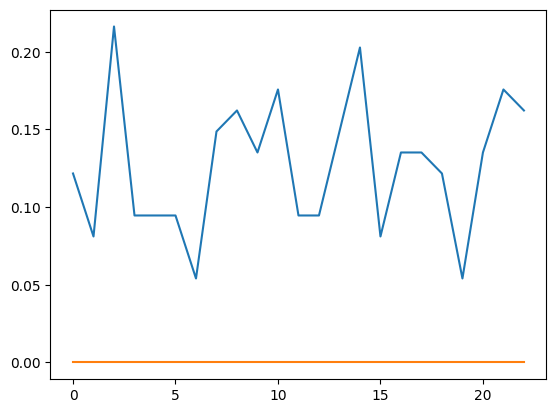

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()


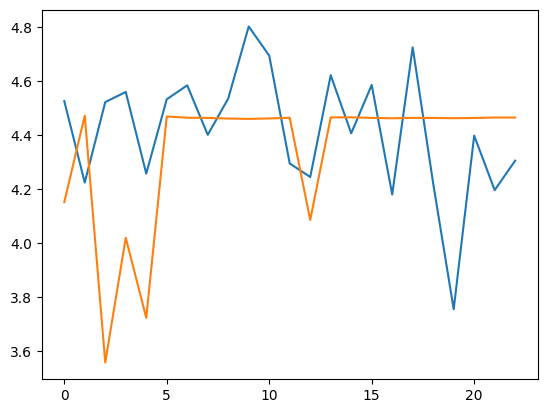

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [107]:
y_pred=model.predict(x_test_sc)

5/5 [==============================] - 0s 5ms/step


In [116]:
y_test_array = y_test.to_numpy()

y_test_reshaped = y_test_array.reshape(-1, 1)


encoder = OneHotEncoder(sparse=False)

y_test_one_hot = encoder.fit_transform(y_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [118]:
y_pred_array = y_test.to_numpy()

y_pred_reshaped = y_test_array.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)

y_pred_one_hot = encoder.fit_transform(y_pred_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
y_test_one_hot.shape


(150, 2)

In [121]:
y_pred_one_hot.shape

(150, 2)

In [122]:
accuracy_score(y_test_one_hot.shape,y_pred_one_hot.shape)

1.0